* References:  **Tim Leung and Xin Li** - *Optimal Mean reversion Trading: Mathematical Analysis and Practical Applications (2015)*

## Abstract

The Cox-Ingersoll-Ross model or CIR model is a process mostly used in mathematical finance to describe the evolution of interest rates. It was first introduced in 1985 by John C. Cox, Jonathan E. Ingersoll and Stephen A. Ross as an extension of the Vasicek model. 

Tim Leung, Xin Li in "Optimal Mean reversion Trading: Mathematical Analysis and Practical Applications" (2015) present the solution to the optimal timing problems for one-time entering and liquidating the position and also provide the ability to find optimal levels for an infinite amount of trades based on CIR process.

The following implementations and descriptions closely follow the work of Tim Leung: Tim Leung and Xin Li Optimal Mean reversion Trading: Mathematical Analysis and Practical Applications. Data used to showcase the module was chosen based on the example in the publication.

## Cox-Ingersoll-Ross model

A CIR process satisfies the following stochastic differential equation:
$$dY_t = \mu(\theta - Y_t)dt + \sigma \sqrt{Y_t} dB_t,$$

$$\theta, \mu, \sigma > 0,$$
$$B\ -\text{a standard Brownian motion}$$

* $\theta$ − long term mean level, all future trajectories of Y will evolve around a mean level 𝜃 in the long run.

* $\mu$ - speed of reversion, characterizes the velocity at which such trajectories will regroup around $\theta$ in time.

* $\sigma$ - instantaneous volatility, measures instant by instant the amplitude of randomness entering the system. Higher values imply more randomness.


The standard deviation factor, $\sigma \sqrt {Y_{t}}$, avoids the possibility of negative $Y_{t}$ values for all positive values of a $\theta$ and $\mu$.

To fit the model to given data we define the log-likelihood function as in Borodin and Salminen (2002):

$$ \ell (\theta,\mu,\sigma|y_0,y_1,\cdots,y_n) := \frac{1}{n}\sum_{i=1}^{n} ln
    f^{CIR}(y_i|y_{i-1};\theta,\mu,\sigma)$$

$$= -ln(\tilde{\sigma}) - \frac{1}{n\tilde{\sigma}}\sum_{i=1}^{n} [y_i +y_{i-1}e^{-\mu \Delta t}] - \frac{1}{n} \sum_{i=1}^{n} [\frac{q}{2}ln(\frac{y_i}{y_{i-1}e^{-\mu\Delta t}}) - ln I_q(\frac{2}{\tilde{\sigma}^2}\sqrt{y_i y_{i-1}e^{-\mu\Delta t}})$$

By applying the maximum likelihood estimation(MLE) method we are able to determine
the parameters of the model and fit the observed portfolio prices to a CIR process.

## Optimal stopping problem

> This approach presumes that the investor wants to commit only two trades: entering the position, and
    liquidating it.

Suppose the investor already has the position the value process of which $(Y_t)_{t>0}$ follows the CIR process. After liquidating the position at the time $\tau$ e receives the value $(Y_{\tau})$ and pays a
constant transaction cost $c_s \in \mathbb{R}$ To maximize the expected discounted value we need to solve
the optimal stopping problem:

$$ V^{\chi}(y) = \underset{\tau \in T}{\sup} \mathbb{E}({e^{-r \tau} (Y_{\tau} - c_s)| Y_0 = y})$$

where $T$ denotes the set of all possible stopping times and $r > 0$ is our subjective constant
discount rate. $V^{\chi}(y)$ represents the expected liquidation value accounted with y.

Current price plus transaction cost  constitute the cost of entering the trade and in combination with $V^{\chi}(y)$
we can formalize the optimal entry problem:


$$J^{\chi}(y) = \underset{\nu \in T}{\sup} \mathbb{E}({e^{-\hat{r} \tau} (V^{\chi}(Y_{\nu}) - Y_{\nu} - c_b)| Y_0 = y})$$

with

$$\hat{r}>0,\ c_b \in \mathbb{R}$$

As an investor our goal is to maximize the expected difference between the current price
of the position - $Y_{\nu}$ and its' expected liquidation value $V^{\chi}(Y_{\nu})$ minus transaction cost
$c_b$

### The solutions:


Theorem 4.2 (p.85):

**The optimal liquidation problem admits the solution:**

$$
    V^{\chi}(x) = \begin{cases} (b^{\chi*} - c_s) \frac{F^{\chi}(x)}{F^{\chi}(b^{\chi*})} , & \mbox{if } x \in [0,b^{\chi*})\\
    \\x - c_s, &  \mbox{ otherwise}  \end{cases}\\
$$

The optimal liquidation level $b^{\chi*}$ is found from the equation:

$$F^{\chi} (b^{\chi}) - (b^{\chi} - c_s)F'^{\chi}(b^{\chi}) = 0$$

Corresponding optimal liquidation time is given by

$$\tau^{\chi*} = inf [t\geq0:Y_t \geq b^{\chi*}]$$

Theorem 4.4 (p.86):

**The optimal entry timing problem admits the solution:**

$$
    J(x) = \begin{cases} V^{\chi}(x) - x - c_b, & \mbox{if } x \in [0,d^{\chi*}) \\
    \\\frac{V^{\chi}(d^{\chi*}) - d^{\chi*} - c_b}{\hat{G^{\chi}}(d^{\chi*})}, & \mbox{if } x \in (d^{\chi*}, \infty)  \end{cases}
$$

The optimal entry level $d^{\chi*}$ is found from the equation:

$$ \hat{G}^{\chi}(d^{\chi})(V'^{\chi}(d^{\chi}) - 1) - \hat{G}'^{\chi}(d^{\chi})(V^{\chi}(d^{\chi}) - d^{\chi} - c_b) = 0$$

Where "$\hat{\ }$" represents the use of transaction cost and discount rate of entering.

## Optimal switching problem

> This approach presumes that the investor can commit an infinite number of trades.


If there is no limit on the number of times the investor will open or close the position, the sequential trading times
are modelled by the stopping times $\nu_1,\tau_1,\nu_2,\tau_2,... \in T$ such that

$$0\leq\nu_1\leq\tau_1\leq\nu_2\leq\tau_2\leq...$$

Where $\nu_i$ are times when the share of a risky asset was bought and $\tau_i$ - when it was sold. In the case
of pairs trading, we consider our spread as such an asset.


To find the optimal levels, first, two critical constants have to be denoted:

$$y_s:=\frac{\mu\theta+rc_s}{\mu+r} \\
    y_b:=\frac{\mu\theta-rc_b}{\mu+r}$$

Theorem 4.7 (p.56):

**Under optimal switching approach it is optimal to re-enter the market if and only if all of the following conditions
hold true:**

a) If $y_b>0$

b) The following inequality must hold true:

$$ c_b < \frac{b^{\chi*}-c_s}{F^{\chi}(b^{\chi*})}$$

In case any of the conditions are not met - re-entering the market is deemed not optimal. It would be advised to exit
at the optimal liquidation price without re-entering, or not enter the position at all. The difference between the
options depends on whether the investor had already entered the market beforehand,
or did he or she start with a zero position.


## How to use the CIR module

For this module, the most suitable input would be a mean-reverting portfolio or an array of two correlated or co-moving asset prices.

Both optimal stopping and optimal switching levels are used alike in determining the rules of our trading strategy:


* If not already entered, enter when the price reaches optimal entry level.

* If not already liquidated, liquidate when the price reaches optimal liquidation level.

However, the difference lies in the applications of the two approaches. The optimal stopping usually 
has a much longer delay between the buy and sell levels are reached and offers a bigger gain than a one-time entry and liquidation using the optimal switching levels. The optimal switching levels, on the other hand, may provide a bigger cumulative gain by performing the trades multiple times during the same time period.


Imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from arbitragelab.optimal_mean_reversion import CoxIngersollRoss

Let's establish a testing sample. Alongside with the numerical example from the book we use generated CIR data with the following parameters:

$\theta$=0.2; $\mu$=0.2; $\sigma$=0.3 

During this step, we also demonstrate the ability of our model to generate artificial CIR data based on given parameters

In [2]:
# Creating a class instance
example = CoxIngersollRoss()

# We establish our training sample
delta_t = 1/252
np.random.seed(30)
cir_example =  example.cir_model_simulation(n=1000, theta_given=0.2, mu_given=0.2,
                                            sigma_given=0.3, delta_t_given=delta_t)

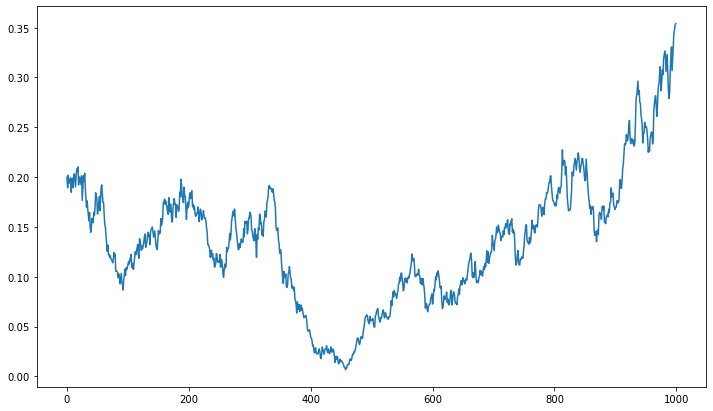

In [3]:
# Plotting the generated CIR process
plt.figure(figsize=(12, 7))
plt.plot(cir_example);

Model fitting uses the same functional structure as the OU and XOU modules:

In [4]:
# Model fitting
example.fit(cir_example, data_frequency="D", discount_rate=0.05,
            transaction_cost=[0.001, 0.001])

Optimal stopping levels can be found separately via respective functions.

In [5]:
# You can separately solve optimal stopping
# and optimal switching problems

# Solving the optimal stopping problem
b = example.optimal_liquidation_level()

d = example.optimal_entry_level()

In [6]:
print("Optimal liquidation level:", round(b,5),
      "\nOptimal entry level:", round(d, 5))

Optimal liquidation level: 0.47419 
Optimal entry level: 0.07586


For the optimal switching level exists a separate function. 

In [7]:
# Solving the optimal switching problem
d_switch, b_switch = example.optimal_switching_levels()

In [8]:
print("Optimal liquidation level:", round(b_switch,5),
      "\nOptimal entry level:", round(d_switch, 5))

Optimal liquidation level: 0.26476 
Optimal entry level: 0.17996


To test the obtained results let's simulate the CIR process based on the fitted model using the respective function.

In [9]:
# Generating a CIR process to calculate the optimal levels
np.random.seed(30)
cir_test = example.cir_model_simulation(n=1000)

To visualize all the obtained results we use the `cir_plot_levels` function. 

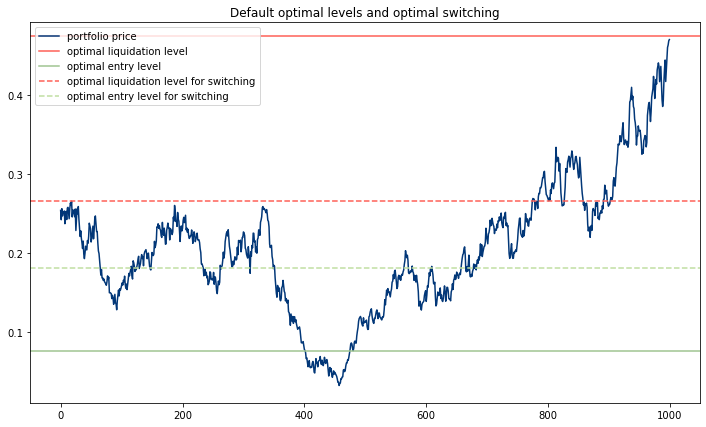

In [10]:
# You can display the results using the plot
fig = example.cir_plot_levels(cir_test, switching=True)

# Adjusting the size of the plot
fig.set_figheight(7)
fig.set_figwidth(12)

Or you can view the model statistics

In [11]:
# Or you can view the model statistics
example.cir_description(switching=True)

training period                          [None, None]
long-term mean                               0.253478
speed of reversion                           0.333065
volatility                                   0.294846
discount rates                           [0.05, 0.05]
transaction costs                      [0.001, 0.001]
beta                                             None
optimal entry level                         0.0758571
optimal liquidation level                    0.474192
optimal switching entry level               [0.26476]
optimal switching liquidation level           0.17996
dtype: object

## Conclusion

This notebook describes the Cox-Ingersoll-Ross (CIR) model and how it is applied to mean reverting portfolios. The main goal of the notebook is to show the usage of the module to obtain solutions to the optimal stopping and optimal switching problems.

Both techniques were introduced by *Tim Leung and Xin Li* in [**Optimal Mean reversion Trading: Mathematical Analysis and Practical Applications**](https://www.amazon.com/Optimal-Mean-Reversion-Trading-Mathematical/dp/9814725919)

Key takeaways from the notebook:

* Cox-Ingersoll-Ross model is a tool used to model the behavior of mean-reverting assets.

* Main idea behind the use of the  optimal levels is:
    
    * If the position is not already entered, enter when the price reaches the optimal entry level.

    * If the position is not already liquidated, liquidate when the price reaches optimal liquidation level.
    
* An optimal stopping problem formulated for the CIR process allows us to maximize the expected discounted value of one-time entering or liquidating the position by finding the optimal price levels at which trades should be committed.

* An optimal switching problem, on the other hand, allows us to maximize the expected discounted value of an infinite amount of trades(entering or liquidating the position). By finding the optimal price levels at which the repeated trades should be committed for the maximum overall gain. 

* The model should be considered as a building block for the problem with any finite number of sequential trades.

## Reference

1. Leung, Tim, and Xin Li. Optimal Mean Reversion Trading: Mathematical Analysis and Practical Applications. World Scientific Publishing Company, 2451. 